<a href="https://colab.research.google.com/github/rianaditro/classification_web_app/blob/main/classification_C5_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Requirement

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split

from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
pip install c45-decision-tree

In [4]:
from C45 import C45Classifier

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt
# generate tree diagram with C45Classifier modul
import graphviz

## Data Pre-processing

In [141]:
df = pd.read_excel('databulu.xlsx')
df.head()

,spesies,texture,structure,color,scale position,scale distance,scale margin,scale pattern,Unnamed: 8,medulla composition,...,medulla margin,hair cross section in the base,hair cross section in the middle,hair cross section in the tip,medulla cross section in the base,medulla cross section in the middle,medulla cross section in the tip,d rambut,d medula,index medula
0,S. barbatus,rough,"straight, curve","black at the base to the middle, broken white ...",transversal,close,rippled,iiregular wave,NaN,amorphous,...,amorphous,circular,circular,circular,flower shape,flower shape,flower shape,35144,28000,0.796722
1,S. barbatus,rough,"straight, curve","black at the base to the middle, broken white ...",transversal,close,rippled,iiregular wave,NaN,amorphous,...,amorphous,circular,circular,circular,flower shape,flower shape,flower shape,36285,29714,0.818906
2,S. barbatus,rough,"straight, curve","black at the base to the middle, broken white ...",transversal,close,rippled,iiregular wave,NaN,amorphous,...,amorphous,circular,circular,circular,flower shape,flower shape,flower shape,40285,33428,0.829788
3,S. barbatus,rough,"straight, curve","black at the base to the middle, broken white ...",transversal,close,rippled,iiregular wave,NaN,amorphous,...,amorphous,circular,circular,circular,flower shape,flower shape,flower shape,31714,26286,0.828845
4,S. barbatus,rough,"straight, curve","black at the base to the middle, broken white ...",transversal,close,rippled,iiregular wave,NaN,amorphous,...,amorphous,circular,circular,circular,flower shape,flower shape,flower shape,39144,31714,0.810188


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   spesies                              1289 non-null   object 
 1   texture                              1289 non-null   object 
 2   structure                            1289 non-null   object 
 3   color                                1289 non-null   object 
 4   scale position                       1289 non-null   object 
 5   scale distance                       1289 non-null   object 
 6   scale margin                         1289 non-null   object 
 7   scale pattern                        1289 non-null   object 
 8   Unnamed: 8                           0 non-null      float64
 9   medulla composition                  1289 non-null   object 
 10  medulla structure                    1289 non-null   object 
 11  medulla pattern               

In [179]:
# removing empty column
df.dropna(how='all', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   spesies                              1289 non-null   object 
 1   texture                              1289 non-null   object 
 2   structure                            1289 non-null   object 
 3   color                                1289 non-null   object 
 4   scale position                       1289 non-null   object 
 5   scale distance                       1289 non-null   object 
 6   scale margin                         1289 non-null   object 
 7   scale pattern                        1289 non-null   object 
 8   medulla composition                  1289 non-null   object 
 9   medulla structure                    1289 non-null   object 
 10  medulla pattern                      1289 non-null   object 
 11  medulla margin                

In [180]:
df.nunique()

spesies                                   5
texture                                   1
structure                                 1
color                                     8
scale position                            1
scale distance                            1
scale margin                              1
scale pattern                             1
medulla composition                       1
medulla structure                         1
medulla pattern                           1
medulla margin                            1
hair cross section in the base            3
hair cross section in the middle          3
hair cross section in the tip             2
medulla cross section in the base         3
medulla cross section in the middle       3
medulla cross section in the tip          3
d rambut                               1009
d medula                               1004
index medula                           1281
dtype: int64

In [181]:
# removing low variance feature
ls = df.nunique().to_list()
idx = [i for i in range(len(ls)) if ls[i] == 1]

df= df.drop(df.columns[idx],axis=1)
df.nunique()

spesies                                   5
color                                     8
hair cross section in the base            3
hair cross section in the middle          3
hair cross section in the tip             2
medulla cross section in the base         3
medulla cross section in the middle       3
medulla cross section in the tip          3
d rambut                               1009
d medula                               1004
index medula                           1281
dtype: int64

In [190]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(df[col].value_counts())

spesies
S. barbatus       270
S. scrofa         269
S. scofa          269
S. celebensis     268
S. verrucossus    213
Name: count, dtype: int64
color
black without gradation                                               324
black at the base to the middle broken white at the tip               270
black at the base broken white at the middle dark brown at the tip    270
black at the base and dark brown at the tip                           268
dark brown at the base and black at the tip                            57
red at the base and dark brown at the tip                              51
white at the base and light brown at the tip                           49
Name: count, dtype: int64
hair cross section in the base
circular      808
triangular    268
oval          213
Name: count, dtype: int64
hair cross section in the middle
oval          538
circular      483
triangular    268
Name: count, dtype: int64
hair cross section in the tip
circular      1021
triangular     268
Name: count, d

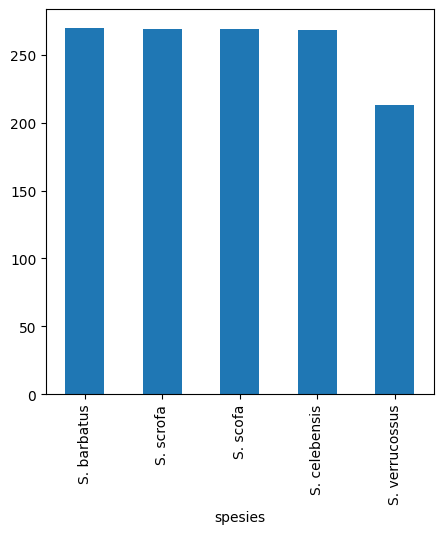

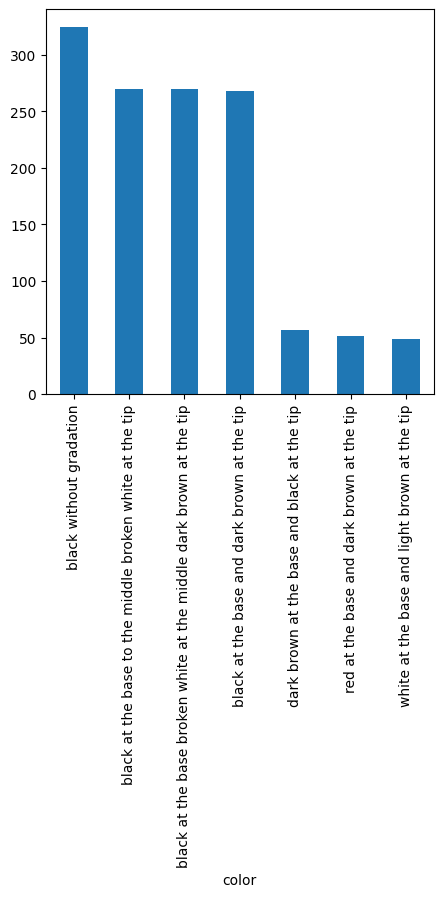

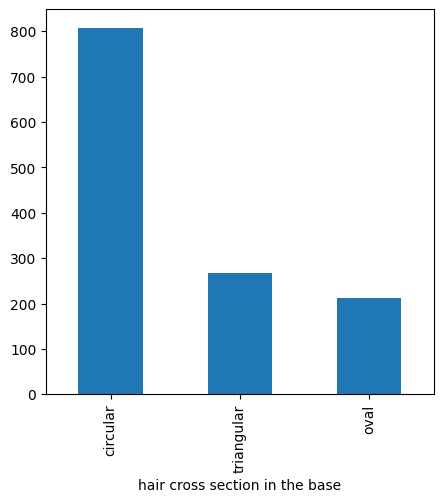

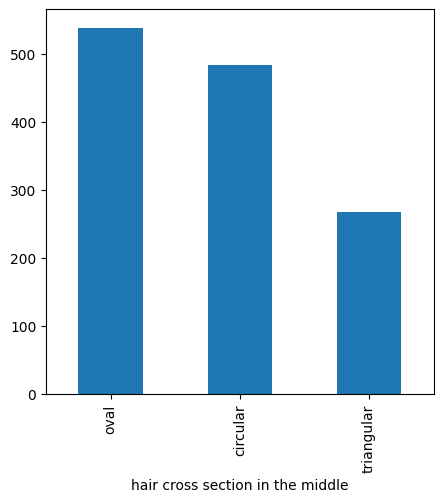

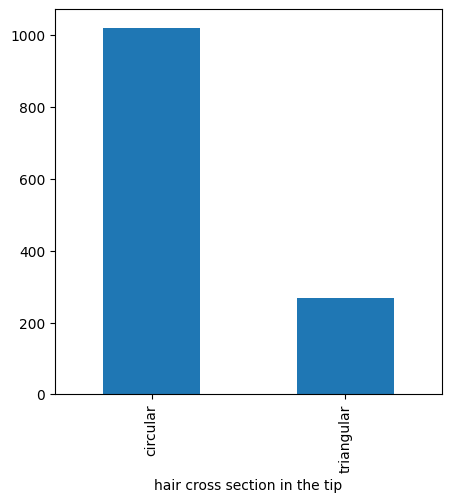

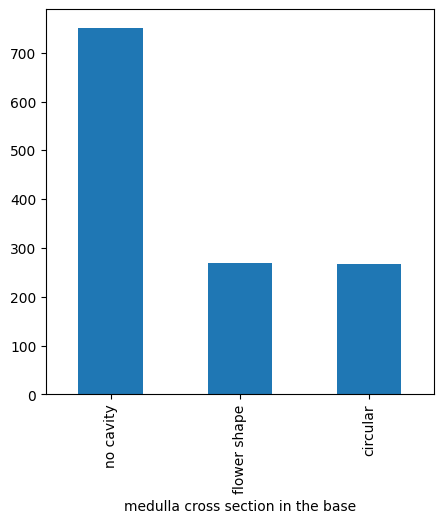

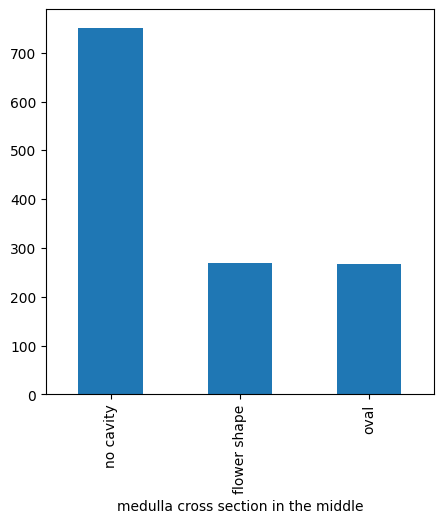

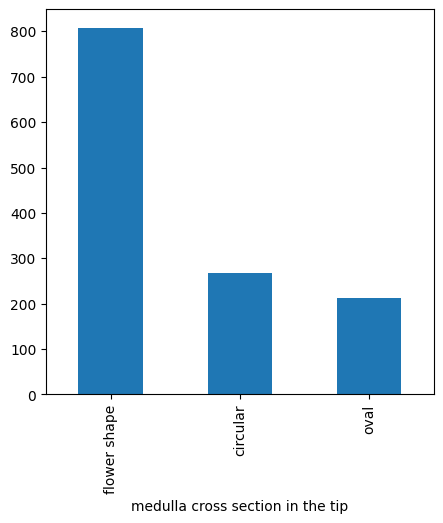

In [191]:
for col in df.columns:
  if df[col].dtype == 'object':
    fig, ax = plt.subplots(figsize=(5,5))
    bar = df[col].value_counts().plot(ax=ax, kind='bar')
    plt.show()

In [183]:
# notice value in the color columns there is a duplicate for 'black without gradation'
df['color'].value_counts()

color
black at the base to the middle, broken white at the tip                270
black at the base, broken white at the middle, dark brown at the tip    270
black, without gradation                                                268
black at the base and dark brown at the tip                             268
dark brown at the base and black at the tip                              57
black without gradation                                                  56
red at the base and dark brown at the tip                                51
white at the base and light brown at the tip                             49
Name: count, dtype: int64

In [184]:
# cleaning data
df['color'] = df['color'].str.replace(",","")
df['color'].value_counts()

color
black without gradation                                               324
black at the base to the middle broken white at the tip               270
black at the base broken white at the middle dark brown at the tip    270
black at the base and dark brown at the tip                           268
dark brown at the base and black at the tip                            57
red at the base and dark brown at the tip                              51
white at the base and light brown at the tip                           49
Name: count, dtype: int64

In [80]:
# check data summary
df[['d rambut', 'd medula', 'index medula']].describe()

,d rambut,d medula,index medula
count,1350.000000,1350.000000,1350.000000
mean,214294.158519,131403.810370,0.639231
std,115383.786251,81007.727935,0.178145
min,27960.000000,4561.000000,0.018959
25%,55429.000000,39093.500000,0.541628
50%,240000.000000,143744.500000,0.682079
75%,291840.750000,188427.250000,0.762259
max,494826.000000,370545.000000,0.921206


<Axes: ylabel='d rambut'>

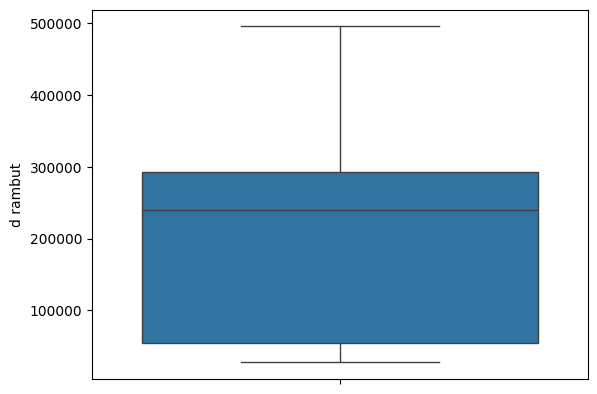

In [98]:
sns.boxplot(df['d rambut'])

<Axes: ylabel='d medula'>

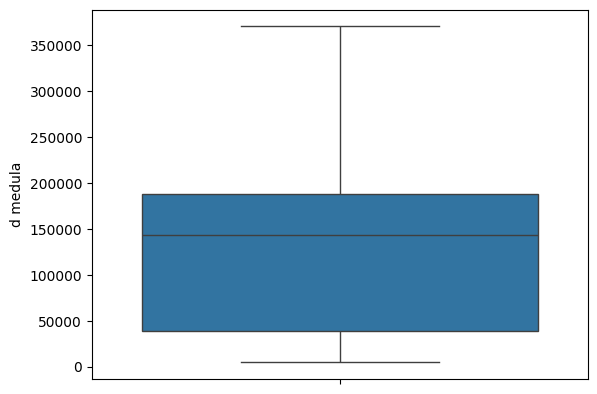

In [99]:
sns.boxplot(df['d medula'])

<Axes: ylabel='index medula'>

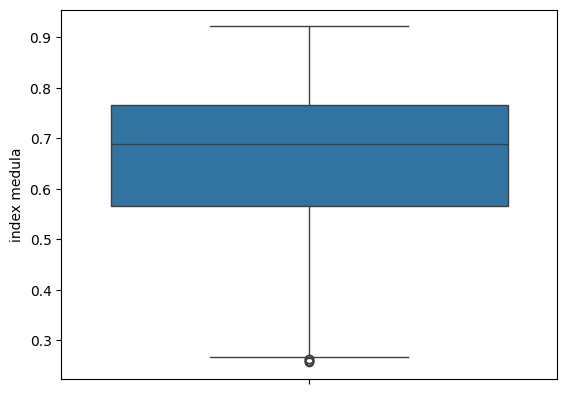

In [168]:
sns.boxplot(df['index medula'])

### Found outliers in the index medula column, handling this with interquartile

In [176]:
# interquartile
Q1 = np.percentile(df['index medula'], 25, method='midpoint')
Q3 = np.percentile(df['index medula'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

0.19916073775214715


In [177]:
# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(df['index medula'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(df['index medula'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

Upper Bound: 1.064441542791923
0
Lower Bound: 0.2677985917833343
0


In [171]:
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['index medula'] >= upper)[0]
lower_array = np.where(df['index medula'] <= lower)[0]
print(upper_array)
print(lower_array)

[]
[801 810 844 962 963]


In [172]:
print(len(lower_array))
print((len(lower_array)/214)*100)
print((len(lower_array)/1294)*100)

5
2.336448598130841
0.38639876352395675


In [ ]:
df.iloc[lower_array]

In [174]:
# removed outliers
df.drop(index=lower_array, inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   spesies                              1289 non-null   object 
 1   texture                              1289 non-null   object 
 2   structure                            1289 non-null   object 
 3   color                                1289 non-null   object 
 4   scale position                       1289 non-null   object 
 5   scale distance                       1289 non-null   object 
 6   scale margin                         1289 non-null   object 
 7   scale pattern                        1289 non-null   object 
 8   Unnamed: 8                           0 non-null      float64
 9   medulla composition                  1289 non-null   object 
 10  medulla structure                    1289 non-null   object 
 11  medulla pattern               

<Axes: ylabel='index medula'>

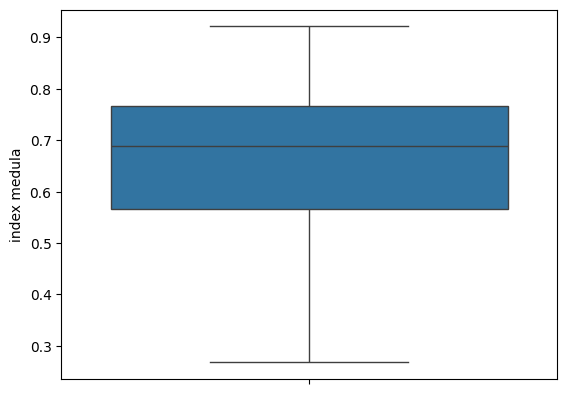

In [175]:
sns.boxplot(df['index medula'])

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1314 entries, 0 to 1349
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   spesies                              1314 non-null   object 
 1   color                                1314 non-null   object 
 2   hair cross section in the base       1314 non-null   object 
 3   hair cross section in the middle     1314 non-null   object 
 4   hair cross section in the tip        1314 non-null   object 
 5   medulla cross section in the base    1314 non-null   object 
 6   medulla cross section in the middle  1314 non-null   object 
 7   medulla cross section in the tip     1314 non-null   object 
 8   d rambut                             1314 non-null   int64  
 9   d medula                             1314 non-null   int64  
 10  index medula                         1314 non-null   float64
dtypes: float64(1), int64(2), object(8)


### Standarization

In [192]:
# standarization
data_to_scale = df[['d rambut', 'd medula', 'index medula']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)
df[['d rambut', 'd medula', 'index medula']] = scaled_data

In [ ]:
# feature selection using previous correlation result
# df = df[['spesies', 'hair cross section in the tip', 'medulla cross section in the tip', 'd medula', 'index medula']]

# This result in low accuracy score, 82,6% for 11 folds with best and lowest accuracy are : 92, 67

In [193]:
# get the percentile to categorize data
bins_d_rambut = [-float('inf'), df['d rambut'].quantile(0.25), df['d rambut'].quantile(0.5), df['d rambut'].quantile(0.75), float('inf')]
bins_d_medula = [-float('inf'), df['d medula'].quantile(0.25), df['d medula'].quantile(0.5), df['d medula'].quantile(0.75), float('inf')]
bins_index = [-float('inf'), df['index medula'].quantile(0.25), df['index medula'].quantile(0.5), df['index medula'].quantile(0.75), float('inf')]

labels = ['under 25%', 'under 50%', 'under 75%', '75% above']

print(bins_d_rambut)
print(bins_d_medula)
print(bins_index)

[-inf, -1.3488907124561678, 0.2325792480329066, 0.6840749019147563, inf]
[-inf, -1.1948070285025285, 0.16219933283240837, 0.6834434515291272, inf]
[-inf, -0.6300898281710672, 0.18425125980098042, 0.6981016144236815, inf]


In [194]:
# convert numerical to categorical
df['d rambut cat'] = pd.cut(df['d rambut'], bins=bins_d_medula, labels=labels, include_lowest=True)
df['d medula cat'] = pd.cut(df['d medula'], bins=bins_d_medula, labels=labels, include_lowest=True)
df['index medula cat'] = pd.cut(df['index medula'], bins=bins_index, labels=labels, include_lowest=True)

In [195]:
df.head()

,spesies,color,hair cross section in the base,hair cross section in the middle,hair cross section in the tip,medulla cross section in the base,medulla cross section in the middle,medulla cross section in the tip,d rambut,d medula,index medula,d rambut cat,d medula cat,index medula cat
0,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.511382,-1.338940,0.904983,under 25%,under 25%,75% above
1,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.501695,-1.317616,1.052926,under 25%,under 25%,75% above
2,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.467739,-1.271409,1.125496,under 25%,under 25%,75% above
3,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.540499,-1.360265,1.119211,under 25%,under 25%,75% above
4,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.477425,-1.292733,0.994787,under 25%,under 25%,75% above


### Pre-processing for the C5.0

In [196]:
tree_df = df.copy()
tree_df.drop(['d rambut','d medula', 'index medula'], axis=1, inplace=True)
tree_df.head()

,spesies,color,hair cross section in the base,hair cross section in the middle,hair cross section in the tip,medulla cross section in the base,medulla cross section in the middle,medulla cross section in the tip,d rambut cat,d medula cat,index medula cat
0,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,under 25%,under 25%,75% above
1,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,under 25%,under 25%,75% above
2,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,under 25%,under 25%,75% above
3,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,under 25%,under 25%,75% above
4,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,under 25%,under 25%,75% above


### Pre-processing for KNN

In [204]:
num_df = df.copy()
num_df.drop(['d rambut cat','d medula cat', 'index medula cat'], axis=1, inplace=True)
num_df.head()

,spesies,color,hair cross section in the base,hair cross section in the middle,hair cross section in the tip,medulla cross section in the base,medulla cross section in the middle,medulla cross section in the tip,d rambut,d medula,index medula
0,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.511382,-1.338940,0.904983
1,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.501695,-1.317616,1.052926
2,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.467739,-1.271409,1.125496
3,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.540499,-1.360265,1.119211
4,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.477425,-1.292733,0.994787


In [205]:
# label encoder
le = LabelEncoder()
for col in num_df.columns:
  if num_df[col].dtypes == 'object':
    num_df[col] = le.fit_transform(num_df[col])
num_df.head()

,spesies,color,hair cross section in the base,hair cross section in the middle,hair cross section in the tip,medulla cross section in the base,medulla cross section in the middle,medulla cross section in the tip,d rambut,d medula,index medula
0,0,2,0,0,0,1,0,1,-1.511382,-1.338940,0.904983
1,0,2,0,0,0,1,0,1,-1.501695,-1.317616,1.052926
2,0,2,0,0,0,1,0,1,-1.467739,-1.271409,1.125496
3,0,2,0,0,0,1,0,1,-1.540499,-1.360265,1.119211
4,0,2,0,0,0,1,0,1,-1.477425,-1.292733,0.994787


## Modelling

In [198]:
# split data for tree C5.0
y_tree = tree_df['spesies']
X_tree = tree_df.drop(['spesies'], axis=1)

In [199]:
# split data into 10 folds
skf = StratifiedKFold(n_splits=10)

### C5.0

In [200]:
model = C45Classifier()
# using folds
for train_index, test_index in skf.split(X_tree, y_tree):
  model.fit(X_tree.iloc[train_index], y_tree.iloc[train_index])
  model.evaluate(X_tree.iloc[test_index], y_tree[test_index])


Evaluation result: 
Total accuracy:  0.9457364341085271
Accuracy  S. barbatus :  1.0
Accuracy  S. celebensis :  1.0
Accuracy  S. scrofa :  0.7407407407407407
Accuracy  S. verrucossus :  1.0
Accuracy  S. scofa :  1.0
Evaluation result: 
Total accuracy:  0.9612403100775194
Accuracy  S. barbatus :  1.0
Accuracy  S. celebensis :  1.0
Accuracy  S. scrofa :  0.8148148148148148
Accuracy  S. verrucossus :  1.0
Accuracy  S. scofa :  1.0
Evaluation result: 
Total accuracy:  0.9612403100775194
Accuracy  S. barbatus :  1.0
Accuracy  S. celebensis :  1.0
Accuracy  S. scrofa :  0.8148148148148148
Accuracy  S. verrucossus :  1.0
Accuracy  S. scofa :  1.0
Evaluation result: 
Total accuracy:  0.8992248062015504
Accuracy  S. barbatus :  1.0
Accuracy  S. celebensis :  1.0
Accuracy  S. scrofa :  0.8518518518518519
Accuracy  S. verrucossus :  1.0
Accuracy  S. scofa :  0.6666666666666666
Evaluation result: 
Total accuracy:  0.8992248062015504
Accuracy  S. barbatus :  1.0
Accuracy  S. celebensis :  1.0
Accur

In [201]:
# accuracy result
folds_acc = [96,96,99,93,94,89,89,96,96,94]
acc_mean = sum(folds_acc)/len(folds_acc)
print(acc_mean)

94.2


In [210]:
model.generate_tree_diagram(graphviz, 'tree_C5_no_outliers')

'tree_C5_no_outliers.png'

In [202]:
model.summary()

Decision Tree Classifier Summary
Number of Instances   :  1161
Number of Attributes  :  10
Number of Leaves      :  39
Number of Rules       :  39
Tree Depth            :  4


In [ ]:
model.write_rule

### CART

In [206]:
# split data for tree C5.0
y_cart = num_df['spesies']
X_cart = num_df.drop(['spesies'], axis=1)

train_x, test_x, train_y, test_y = train_test_split(X_cart, y_cart, test_size=0.2, stratify=y_cart)

In [219]:
cart = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)
cart = cart.fit(train_x, train_y)

In [220]:
y_pred = cart.predict(test_x)
acc = accuracy_score(y_pred, test_y)
print(acc)

0.937984496124031


[Text(0.6875, 0.9375, 'x[0] <= 1.5\nentropy = 2.316\nsamples = 1031\nvalue = [216, 214, 215, 215, 171]'),
 Text(0.44476744186046513, 0.8125, 'x[7] <= 0.656\nentropy = 1.0\nsamples = 430\nvalue = [0, 0, 215, 215, 0]'),
 Text(0.16279069767441862, 0.6875, 'x[7] <= 0.208\nentropy = 0.439\nsamples = 187\nvalue = [0, 0, 170, 17, 0]'),
 Text(0.13953488372093023, 0.5625, 'entropy = 0.0\nsamples = 82\nvalue = [0, 0, 82, 0, 0]'),
 Text(0.18604651162790697, 0.5625, 'x[8] <= 0.531\nentropy = 0.639\nsamples = 105\nvalue = [0, 0, 88, 17, 0]'),
 Text(0.09302325581395349, 0.4375, 'x[7] <= 0.261\nentropy = 0.436\nsamples = 78\nvalue = [0, 0, 71, 7, 0]'),
 Text(0.046511627906976744, 0.3125, 'x[0] <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [0, 0, 4, 3, 0]'),
 Text(0.023255813953488372, 0.1875, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0]'),
 Text(0.06976744186046512, 0.1875, 'x[8] <= -0.02\nentropy = 0.811\nsamples = 4\nvalue = [0, 0, 1, 3, 0]'),
 Text(0.046511627906976744, 0.0625, 'entropy = 

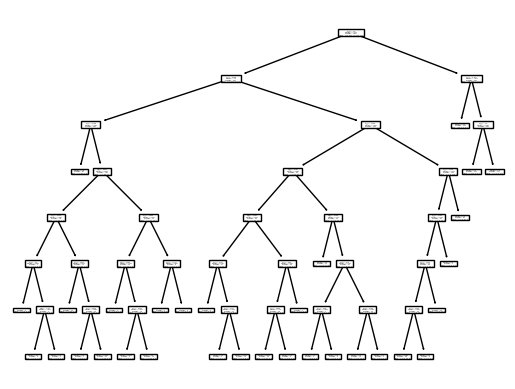

In [221]:
tree.plot_tree(cart)

### KNN

In [209]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(train_x, train_y)
y_pred = knn.predict(test_x)
acc = accuracy_score(y_pred, test_y)
print(acc)

0.9651162790697675


## Down here is a trial mode for KNN





In [222]:
# sample data to predict
xx = test_x.iloc[10].values.reshape(1,-1)
yy = test_y.iloc[10]
# print(type(xx))
xx

array([[3.        , 2.        , 2.        , 1.        , 0.        ,
        2.        , 0.        , 0.49734747, 0.81560825, 0.52838586]])

In [223]:
y_pred = knn.predict(xx)
distances, indices = knn.kneighbors(xx)

print("Indices of neighbors:", indices)
print("Distances to neighbors:", distances)

Indices of neighbors: [[511  51 979 823 615 507 905 556 123 455 290]]
Distances to neighbors: [[0.00596514 0.05891632 0.07666065 0.1019074  0.11320594 0.11375335
  0.12254603 0.12474175 0.12612623 0.12747813 0.1288248 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [224]:
print(df['spesies'].iloc[indices[0]].value_counts())

spesies
S. celebensis     4
S. verrucossus    3
S. barbatus       2
S. scrofa         2
Name: count, dtype: int64


In [ ]:
num_df.iloc[[608, 134, 731, 900, 445]]

,spesies,color,hair cross section in the base,hair cross section in the middle,hair cross section in the tip,medulla cross section in the base,medulla cross section in the middle,medulla cross section in the tip,d rambut,d medula,index medula
608,3,1,0,1,0,2,1,1,1.113297,0.423255,-0.874816
134,0,2,0,0,0,1,0,1,-1.517120,-1.181730,1.511883
731,3,0,0,1,0,2,1,1,1.493075,1.840916,0.485400
900,4,6,1,0,0,2,1,2,0.201133,-0.603843,-1.638751
445,1,3,2,2,1,0,2,0,0.125730,0.299789,0.231358


In [ ]:
test_x.iloc[10]

color                                  0.000000
hair cross section in the base         0.000000
hair cross section in the middle       1.000000
hair cross section in the tip          0.000000
medulla cross section in the base      2.000000
medulla cross section in the middle    1.000000
medulla cross section in the tip       1.000000
d rambut                               1.137217
d medula                               0.953907
index medula                          -0.198005
Name: 671, dtype: float64

In [ ]:
df['spesies'].iloc[[608, 134, 731, 900, 445]]

,spesies,color,hair cross section in the base,hair cross section in the middle,hair cross section in the tip,medulla cross section in the base,medulla cross section in the middle,medulla cross section in the tip,d rambut,d medula,index medula
608,S. scrofa,black at the base broken white at the middle d...,circular,oval,circular,no cavity,no cavity,flower shape,1.113297,0.423255,-0.874816
134,S. barbatus,black at the base to the middle broken white a...,circular,circular,circular,flower shape,flower shape,flower shape,-1.517120,-1.181730,1.511883
731,S. scrofa,black at the base and dark brown at the tip,circular,oval,circular,no cavity,no cavity,flower shape,1.493075,1.840916,0.485400
900,S. verrucossus,white at the base and light brown at the tip,oval,circular,circular,no cavity,no cavity,oval,0.201133,-0.603843,-1.638751
445,S. celebensis,black without gradation,triangular,triangular,triangular,circular,oval,circular,0.125730,0.299789,0.231358


In [ ]:
print(y_pred)
print(yy)

[3]
3


## Down here is trial using one hot encoding and reduced col with correlation above 0.8

### CART Trial

In [ ]:
y = df_reduced['spesies']
X = df_reduced.drop(['spesies'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
tree_clf = tree.DecisionTreeClassifier(criterion='entropy')
tree_clf = tree_clf.fit(train_x, train_y)
predicted = tree_clf.predict(test_x)
acc = accuracy_score(predicted, test_y)
print(acc)

0.9333333333333333


In [ ]:
tree.plot_tree(tree_clf)

## C5 trial

In [ ]:
model = C45Classifier()
model.fit(train_x, train_y)
model.evaluate(test_x, test_y)

Evaluation result: 
Total accuracy:  0.8296296296296296
Accuracy  3 :  1.0
Accuracy  0 :  1.0
Accuracy  2 :  0.14814814814814814
Accuracy  1 :  1.0
Accuracy  4 :  1.0


Note :
use label encoder saja, tetap pakai selected feature dari correlation-nya.
untuk C5 tinggal tambah kolom category untuk yang integer.
gunakan df.copy() untuk data latih C5 dan validasi KNN (invert transform)

siapkan df baru untuk KNN yang telah di label-encoder